# Settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [21]:
# 본인 구글 드라이브에 업로드한 housing.xls 파일의 주소를 넣어주세요!
house = pd.read_excel('/content/housing.xls')

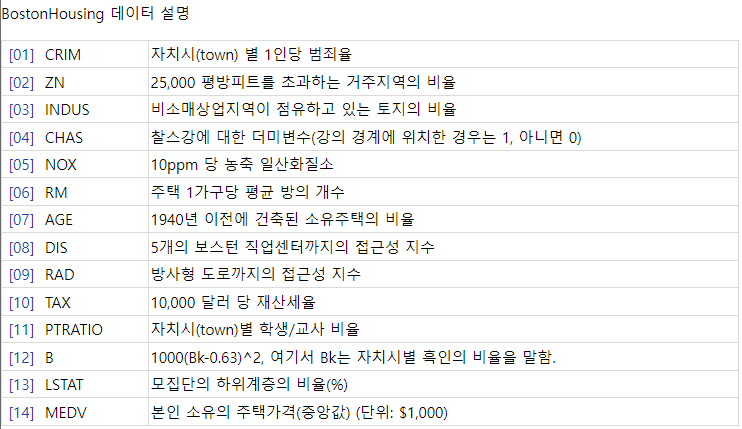

In [4]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# EDA

In [5]:
house.shape

(506, 14)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
# value counts
house.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

## 결측치 처리

In [8]:
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 히스토그램

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

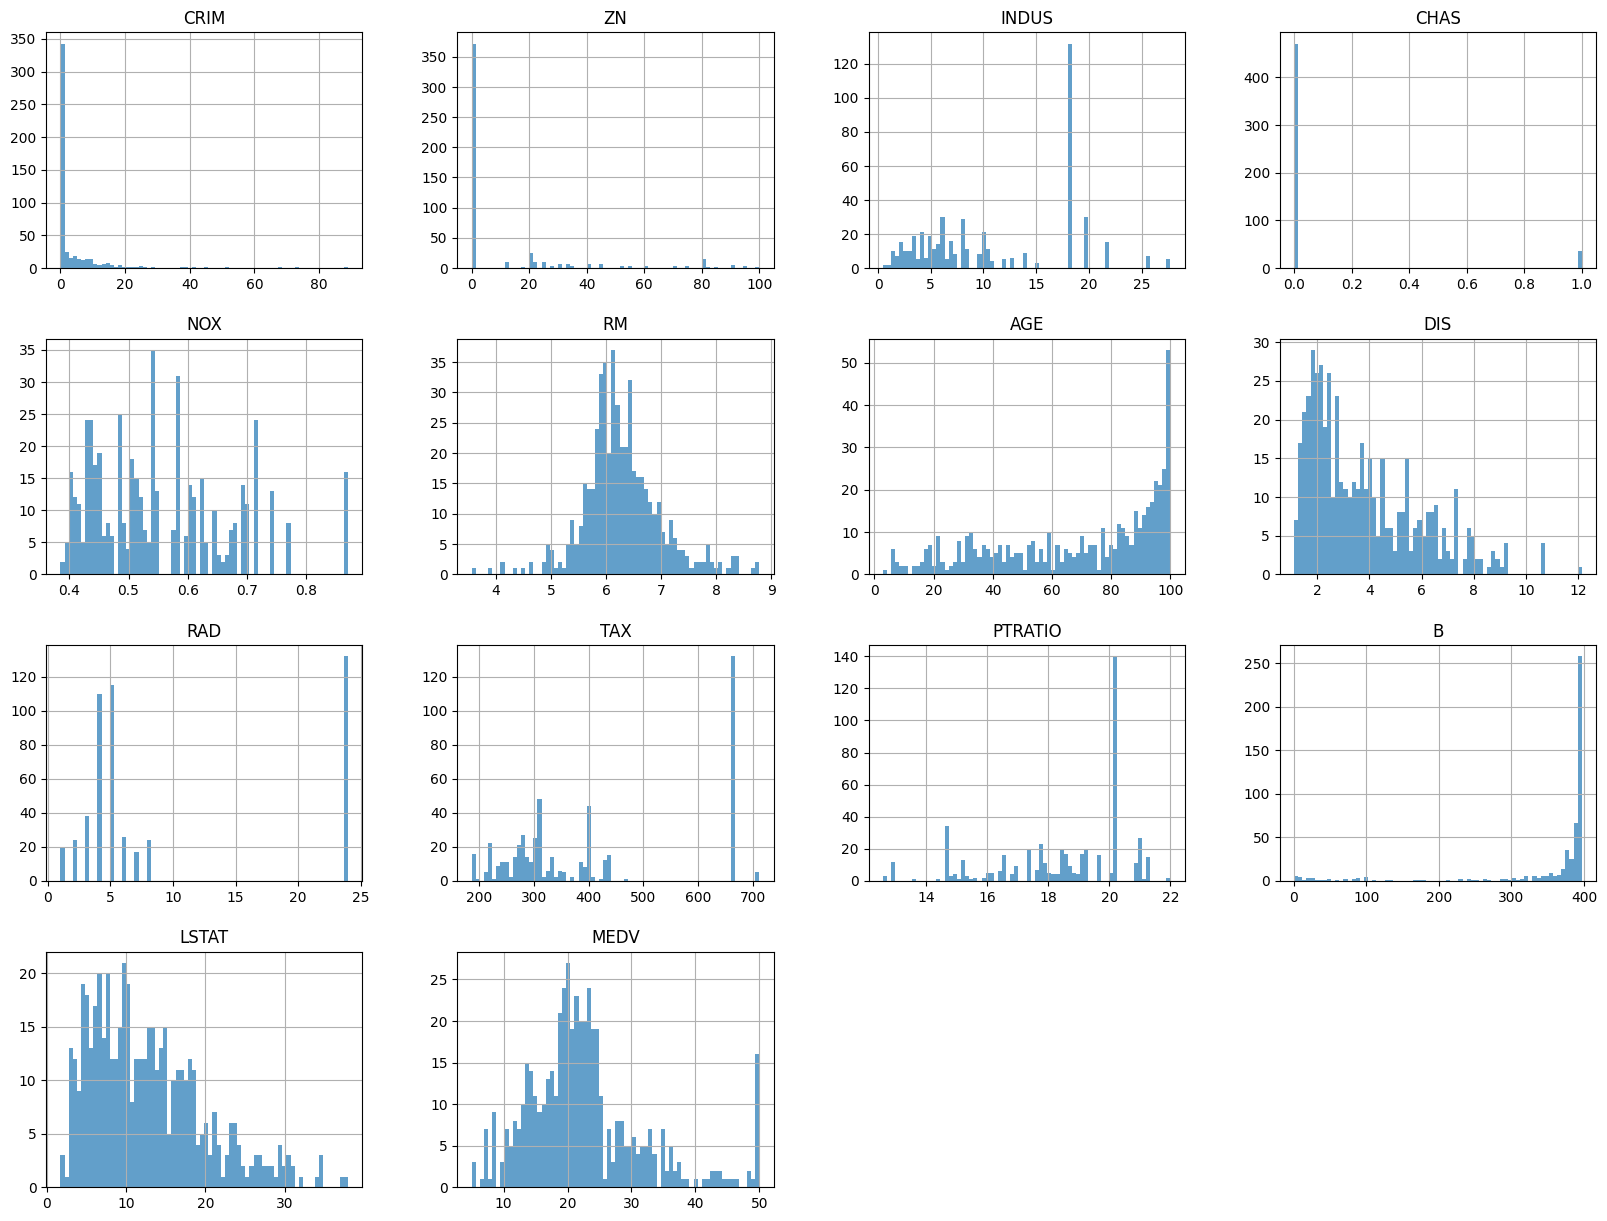

In [9]:
house.hist(bins = 70, figsize = (20,15), alpha = 0.7)

## 상관관계 분석

<Axes: >

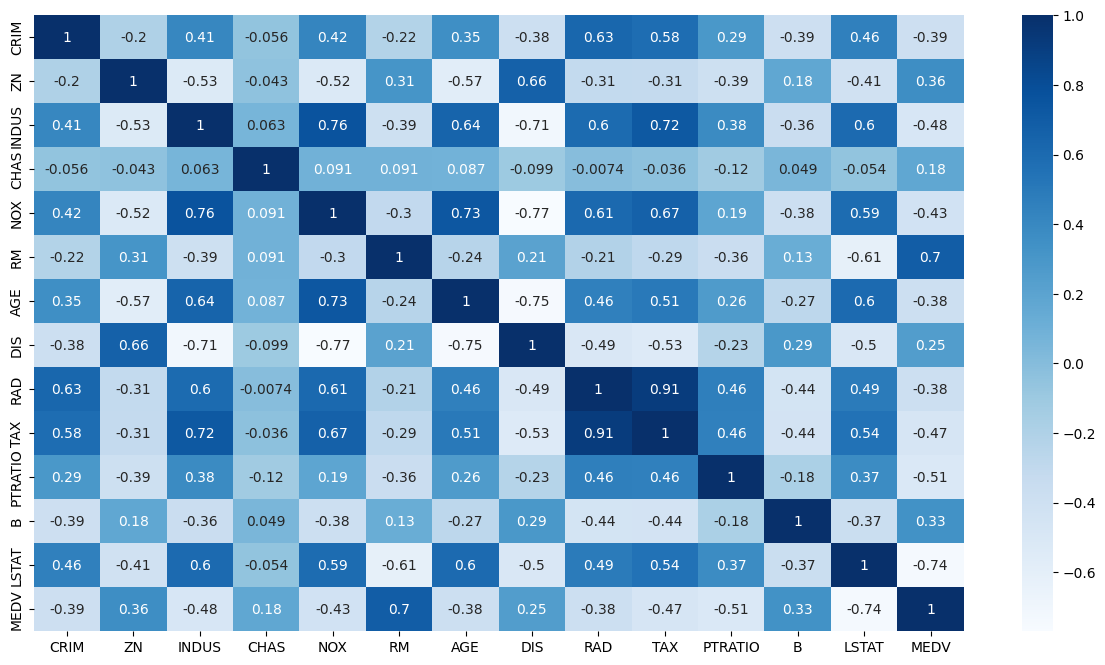

In [10]:
corr = house.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap = 'Blues')

# Ridge, Lasso, ElasticNet에서 alpha 값의 변화에 따른 MEDV 예측 변수들의 ***계수*** 변화를 시각화해보세요

참고 링크 : https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html

## 정규화, Standard Scaler 사용하기, CHAS, RAD 제외

In [22]:
from sklearn.preprocessing import StandardScaler

# 정규화 대상
scale_columns = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS','TAX', 'PTRATIO', 'B', 'LSTAT']

# 정규화
# house 내의 scale_columns 들만 정규화된 값으로 바꾸기(CHAS, RAD 터치 X)
scaler = StandardScaler()
house1 = pd.DataFrame(scaler.fit_transform(house[scale_columns]))
house1.columns = scale_columns
house1['CHAS'] = house['CHAS']
house1['RAD'] = house['RAD']
house1['MEDV'] = house['MEDV']
house = house1

# 정규화 안한 독립변수 2개까지 포함된 데이터로 준비
X = house.drop(['MEDV'], axis = 1)
y = house['MEDV']
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS,RAD
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,0,1
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,0,2
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,0,2
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,0,3
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,0,3


In [37]:
# alpha 값에 따른 계수 변화(Ridge)
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 1, 5) #log(-3)~log(1) 사이에 등간격인 5개의 행벡터 생성, base=10

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
#hstack : 가로로 결합하여 series형태로 저장, data라는 프레임에 각 alpha값에 대한 결합값을 append해줌(덧붙여줌)

df_ridge = pd.DataFrame(data, index=alpha).T
#가로로 저장된 값에 대하여 transpose해줌 (index가 열인거처럼 보임!)
df_ridge

df_ridge

,0.001,0.010,0.100,1.000,10.000
0,19.424410,19.424732,19.427955,19.459760,19.740746
1,-0.928144,-0.928126,-0.927943,-0.926107,-0.907617
2,1.081556,1.081441,1.080299,1.069023,0.969933
3,0.140888,0.140778,0.139680,0.128822,0.032357
4,-2.056693,-2.056465,-2.054188,-2.031713,-1.832621
5,2.674237,2.674295,2.674880,2.680612,2.727648
6,0.019463,0.019439,0.019191,0.016714,-0.007034
7,-3.104018,-3.103777,-3.101372,-3.077541,-2.859351
8,-2.076754,-2.076507,-2.074039,-2.049657,-1.834553
9,-2.060604,-2.060585,-2.060386,-2.058352,-2.034741


In [34]:
# alpha 값에 따른 계수 변화(Lasso)
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T

df_lasso

,0.001,0.010,0.100,1.000,10.000
0,19.436813,19.545929,20.391200,23.265446,25.120090
1,-0.926444,-0.911265,-0.744477,-0.000000,-0.000000
2,1.077296,1.039833,0.732326,0.000000,0.000000
3,0.133547,0.067957,-0.000000,-0.000000,-0.000000
4,-2.048842,-1.985233,-1.552310,-0.000000,-0.000000
5,2.675453,2.684264,2.782811,2.827338,0.000000
6,0.015751,0.000000,-0.000000,-0.000000,-0.000000
7,-3.100333,-3.060578,-2.486172,-0.000000,0.000000
8,-2.066033,-1.970075,-1.400274,-0.000000,-0.000000
9,-2.059265,-2.048849,-2.001786,-1.116447,-0.000000


In [35]:
# alpha 값에 따른 계수 변화(ElasticNet)
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    elastic = ElasticNet(alpha=a,l1_ratio=0.5).fit(X, y)
    data.append(pd.Series(np.hstack([elastic.intercept_, elastic.coef_])))

df_elastic = pd.DataFrame(data, index=alpha).T


df_elastic

,0.001,0.010,0.100,1.000,10.000
0,19.439601,19.570849,20.455969,23.122950,25.491471
1,-0.926784,-0.914514,-0.793627,-0.262074,-0.000000
2,1.076252,1.029754,0.722845,0.063856,0.000000
3,0.134144,0.076111,-0.056496,-0.210135,-0.000000
4,-2.046418,-1.958922,-1.420964,-0.144619,-0.000000
5,2.676463,2.695158,2.807962,2.410427,0.130752
6,0.016928,0.000000,-0.000000,-0.000000,-0.000000
7,-3.095468,-3.017222,-2.275981,-0.000000,0.000000
8,-2.064511,-1.958562,-1.356824,-0.107408,-0.000000
9,-2.059372,-2.048699,-1.961581,-1.234033,-0.000000


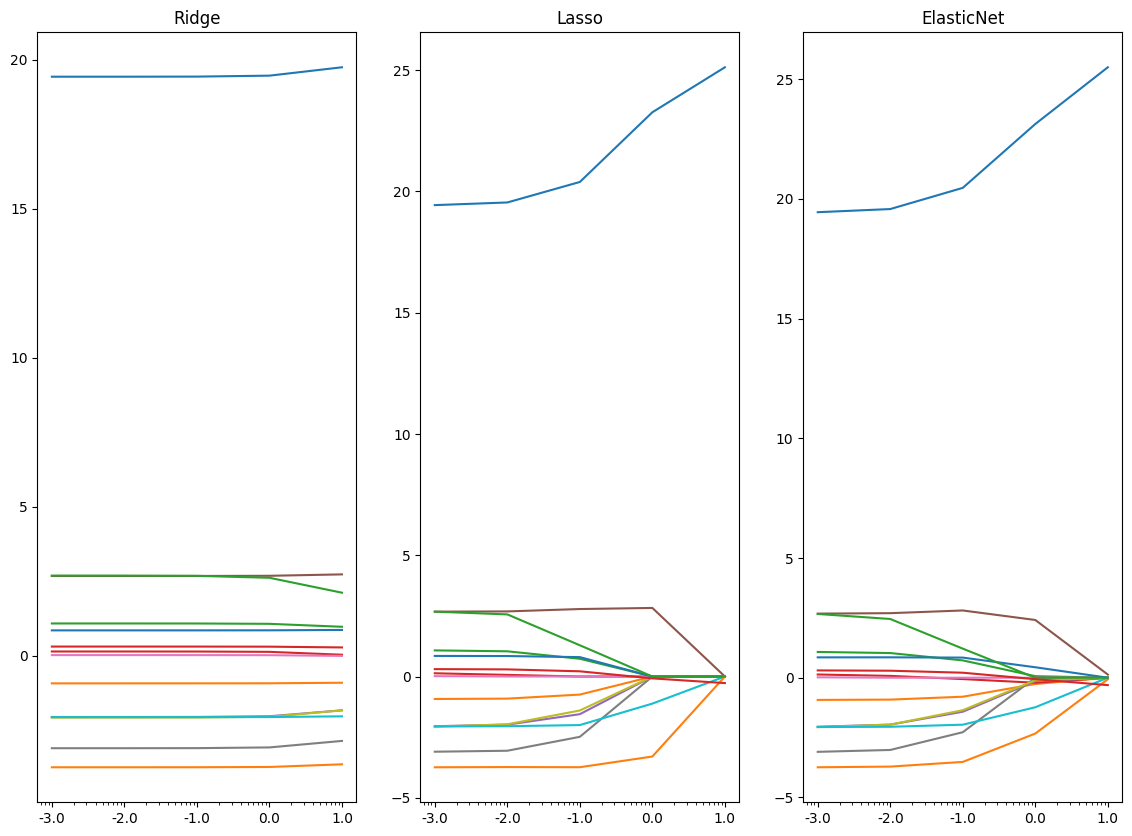

In [36]:
# 시각화
fig = plt.figure(figsize=(14,10))

# Ridge
ax1 = plt.subplot(131)
plt.semilogx(df_ridge.T) #semilogx : x축 log scale / df_ridge는 전치된 형태 따라서 다시 전치해줄 필요 있음
plt.xticks(alpha, labels = np.log10(alpha)) #x축 눈금 표시
plt.title("Ridge")

# Lasso
ax2 = plt.subplot(132)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

# ElasticNet
ax3 = plt.subplot(133)
plt.semilogx(df_elastic.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("ElasticNet")

plt.show()

# Linear Regression(참고용)

In [ ]:
# Spliting target and independent variables
X = house.drop(['MEDV'], axis = 1)
y = house['MEDV']

In [ ]:
# Splitting train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.113056
1,ZN,0.03011
2,INDUS,0.040381
3,CHAS,2.784438
4,NOX,-17.202633
5,RM,4.438835
6,AGE,-0.006296
7,DIS,-1.447865
8,RAD,0.26243
9,TAX,-0.010647


## model evaluation

In [ ]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [ ]:
# Model Evaluation
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 3.314771626783228
MSE: 21.641412753226312
RMSE: 4.6520331848801675


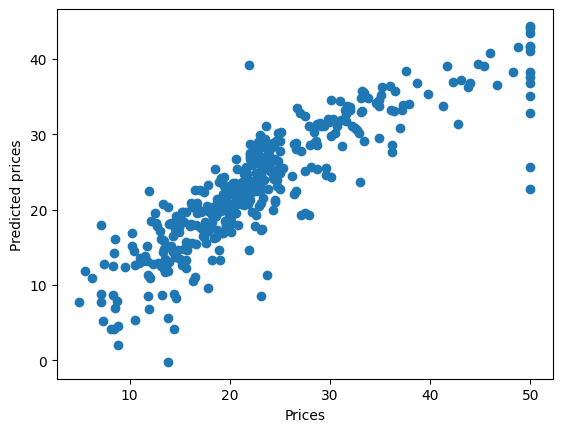

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

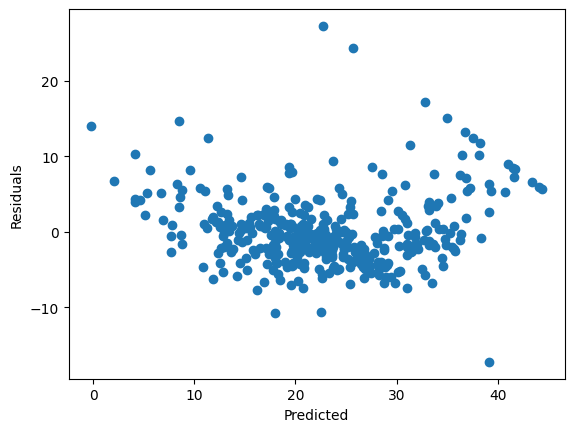

In [ ]:
# residuals
plt.scatter(y_pred,y_train-y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()